<h1> LetsGrowMore (LGMVIPMAR2022) </h1>
<h2> Author Name - Vaibhav Channe </h2>
<h2> Task 1 - Iris Flower Classification ML Project </h2>
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

<h3>IMPORTING LIBRARIES</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

<h3>READING THE DATA-SET</h3>

In [7]:
df=pd.read_csv("Iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>LOOKING INTO THE SHAPE</h3>

In [8]:
df.shape

(150, 5)

<h3>DESCRIPTIVE SUMMARY OF THE DATASET</h3>

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<h3>Exploratory Data Analysis
    


    
<h3>CHECKING FOR OUTLIERS</h3>

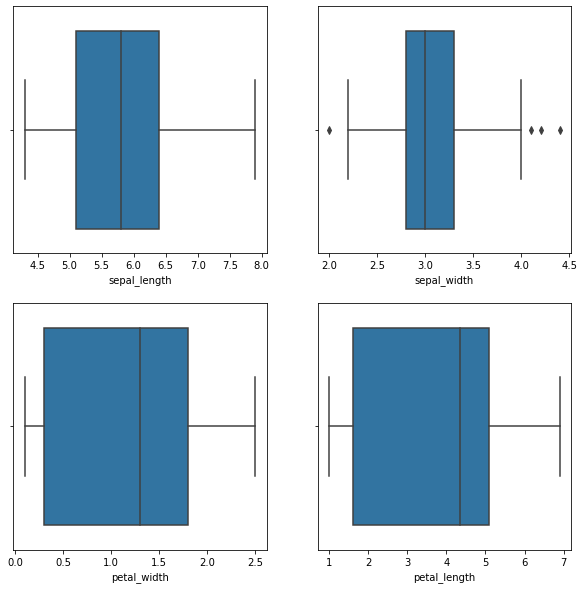

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["sepal_length"])

plt.subplot(2,2,2)
sns.boxplot(x=df["sepal_width"])

plt.subplot(2,2,3)
sns.boxplot(x=df["petal_width"])

plt.subplot(2,2,4)
sns.boxplot(x=df["petal_length"])
plt.show()

<h3>OUTLIER TREATMENT</h3>

In [12]:
print(df['sepal_width'].quantile(0.50)) 
print(df['sepal_width'].quantile(0.95)) 

3.0
3.8


In [13]:
df['sepal_width'] = np.where(df['sepal_width'] >3.8,3, df['sepal_width'])

<AxesSubplot:xlabel='sepal_width'>

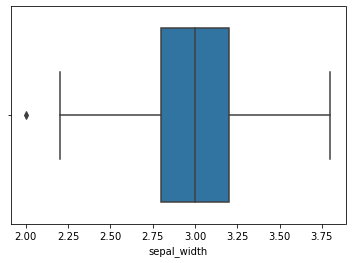

In [14]:
sns.boxplot(x=df["sepal_width"])

<h3>DATA VISUALIZATION</h3>

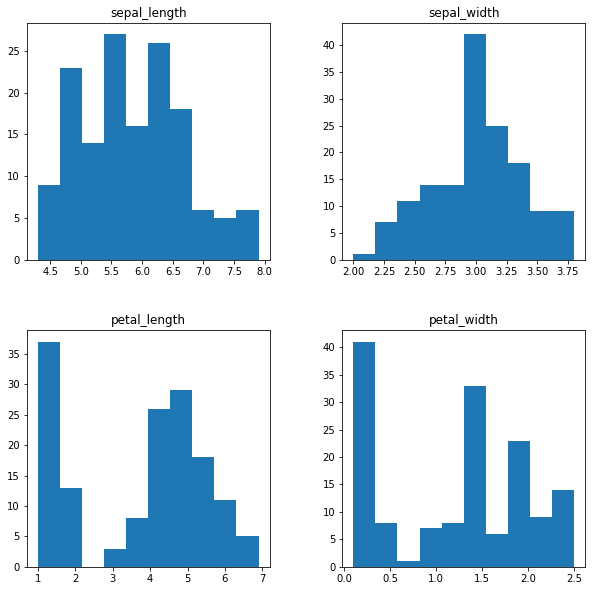

In [15]:
df.hist(figsize=(10,10),grid= False)
plt.show()

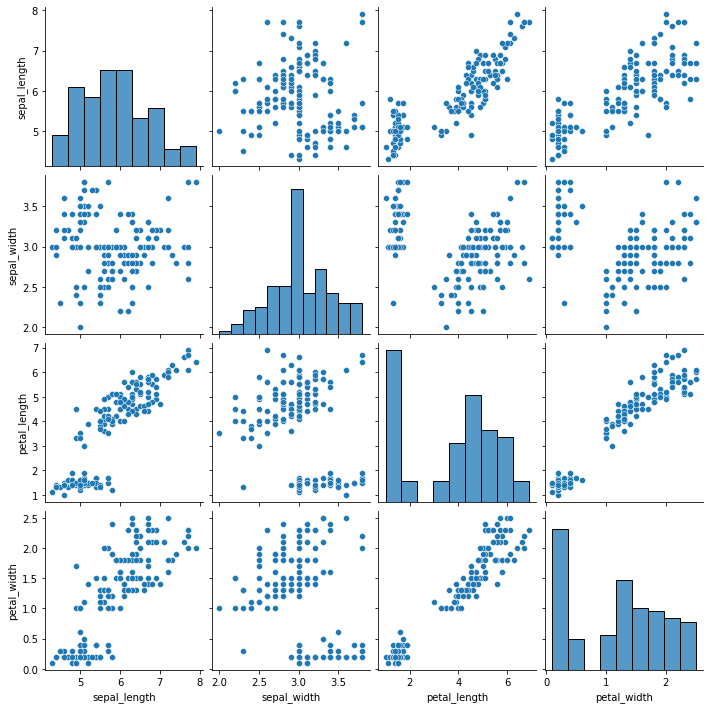

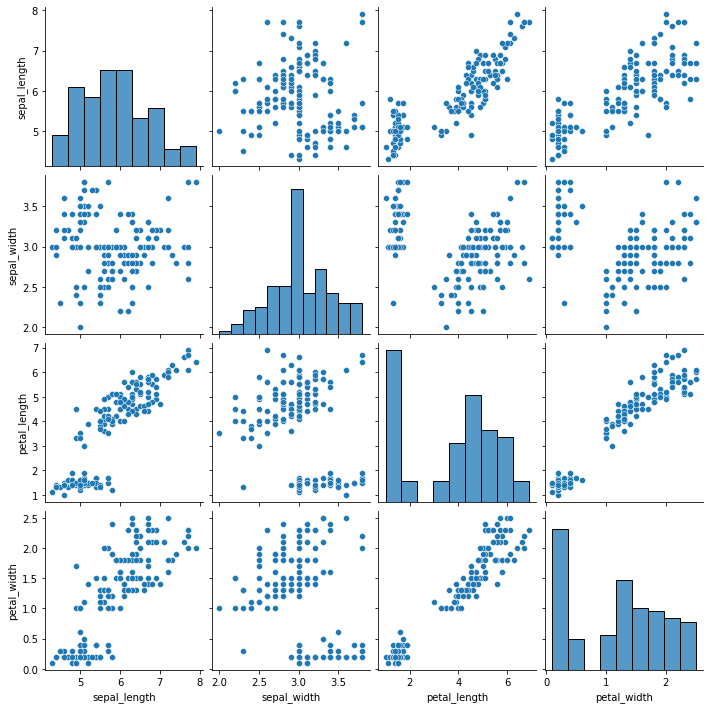

In [16]:
# plt.figure(figsize=(10,10));
# sns.pairplot(df,hue="class");
sns.pairplot(data=df.drop(columns=['class']))
sns.pairplot(data=df)


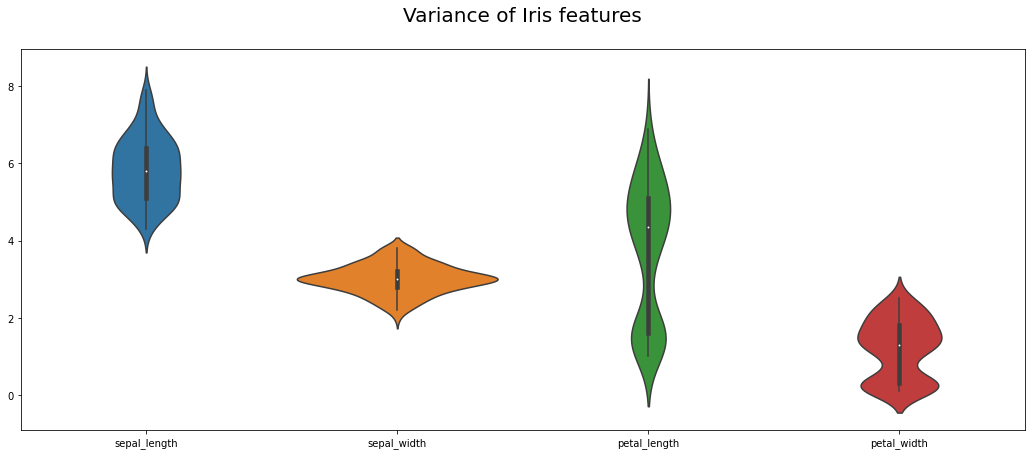

In [17]:
plt.figure(figsize=(18,7))
sns.violinplot(data=df).set_title("Variance of Iris features\n",size=20)
plt.show()

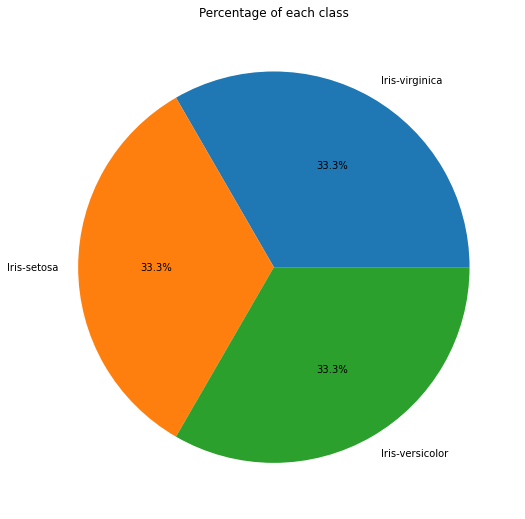

In [18]:
plt.figure(figsize=(9,9))
plt.pie(df["class"].value_counts(),labels=df["class"].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of each class")
plt.show()

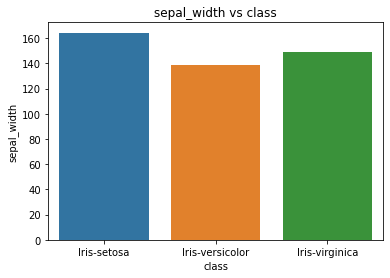

In [19]:
sns.barplot( x='class', y='sepal_width', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_width vs class ")
plt.show()


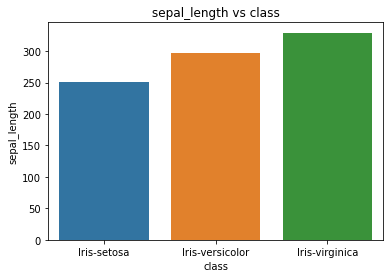

In [20]:
sns.barplot( x='class', y='sepal_length', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_length vs class ")
plt.show()


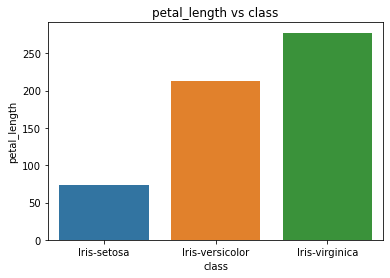

In [21]:
sns.barplot( x='class', y='petal_length', estimator = np.sum, data=df, ci=None)
plt.title("petal_length vs class")
plt.show()

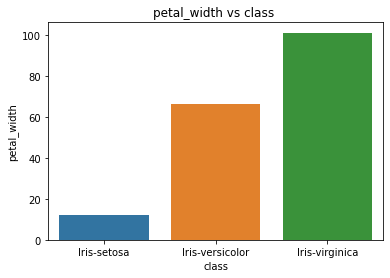

In [22]:
sns.barplot( x='class', y='petal_width', estimator = np.sum, data=df, ci=None)
plt.title("petal_width vs class ")
plt.show()

<h3>CORRELATION</h3>

In [23]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.079267,0.871754,0.817954
sepal_width,-0.079267,1.000000,-0.331077,-0.270844
petal_length,0.871754,-0.331077,1.000000,0.962757
petal_width,0.817954,-0.270844,0.962757,1.000000


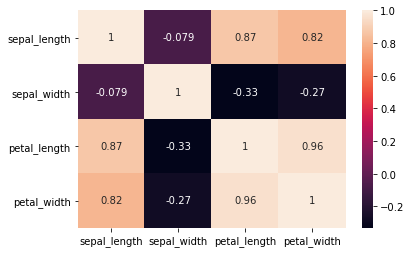

In [24]:
sns.heatmap(corr, annot=True);

<h3>MODEL BUILDING</h3>

<h3>LABEL ENCODING</h3>

In [25]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['class']=l.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>SPLITTING DATA INTO TRAINING AND TESTING</h3>

In [26]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["class"])
Y=df["class"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

<h3>MODEL TRAINING AND TESTING</h3>

<h3>LOGISTIC REGRESSION</h3>

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=150)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 100.0


<h3>K Nearest Neighbours</h3>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)


The accuracy of the model is : 100.0


<h3>DECISION TREE</h3>

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 100.0


<h3>RANDOM FOREST
</h3>

In [30]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 100.0


<h3>CONCLUSIONS</h3>

The accuracy of model is 100 by using Random Forest, Decesion Tree, KNN.


### END OF CODE